In [1]:
import pandas as pd

In [2]:
tab=pd.read_excel('SPEAKER.xls')
tab=tab[tab['SUBSET']==' train-clean-100  '].head(10)
tab.head(10)

,ID,SEX,SUBSET,MINUTES,NAME
3,19,F,train-clean-100,25.19,Kara Shallenberg
8,26,M,train-clean-100,25.08,Denny Sayers
9,27,M,train-clean-100,20.14,Sean McKinley
14,32,F,train-clean-100,24.01,Betsie Bush
18,39,F,train-clean-100,25.05,Sherry Crowther
19,40,F,train-clean-100,25.04,Vicki Barbour
32,60,M,train-clean-100,20.18,
41,78,M,train-clean-100,25.05,Hugh McGuire
45,83,F,train-clean-100,25.04,Catharine Eastman
48,87,F,train-clean-100,25.10,Rosalind Wills


In [4]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T


1.11.0+cpu
0.11.0+cpu


C:\Users\Paul\anaconda3\lib\site-packages\torchaudio\backend\utils.py:66: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [20]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
signal, sr=librosa.load("LibriSpeech/19-198-0000.flac")

In [21]:
signal

array([0.00419951, 0.0039704 , 0.00297183, ..., 0.00691535, 0.00542614,
       0.        ], dtype=float32)

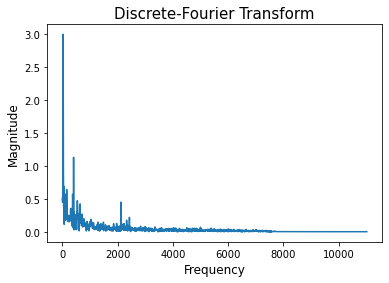

In [32]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal,n=3000)
# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)
# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))
# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]
plt.plot(left_freq, left_mag)
plt.title('Discrete-Fourier Transform', fontdict=dict(size=15))
plt.xlabel('Frequency', fontdict=dict(size=12))
plt.ylabel('Magnitude', fontdict=dict(size=12))
plt.show()

In [33]:
len(left_mag)

1500

In [35]:
pd.DataFrame(left_mag)

,0
0,0.509853
1,0.449110
2,0.782128
3,2.993713
4,2.418143
...,...
1495,0.003487
1496,0.003487
1497,0.003487
1498,0.003487


In [19]:
signal

array([0.00419951, 0.0039704 , 0.00297183, ..., 0.00691535, 0.00542614,
       0.        ], dtype=float32)